In [1]:
%matplotlib notebook
import uproot
import matplotlib.pyplot as plt


In [2]:
file = uproot.open('rec_barrel_clusters.root')


In [4]:
file.keys()


['events;1', 'metadata;1']

In [3]:
file.classnames()


{'events': 'TTree', 'metadata': 'TTree'}

In [5]:
tree = file['events']


In [6]:
tree.keys()


['mcparticles2',
 'mcparticles2/mcparticles2.ID',
 'mcparticles2/mcparticles2.g4Parent',
 'mcparticles2/mcparticles2.reason',
 'mcparticles2/mcparticles2.mask',
 'mcparticles2/mcparticles2.steps',
 'mcparticles2/mcparticles2.secondaries',
 'mcparticles2/mcparticles2.pdgID',
 'mcparticles2/mcparticles2.status',
 'mcparticles2/mcparticles2.colorFlow[2]',
 'mcparticles2/mcparticles2.genStatus',
 'mcparticles2/mcparticles2.charge',
 'mcparticles2/mcparticles2.spare[1]',
 'mcparticles2/mcparticles2.spin[3]',
 'mcparticles2/mcparticles2.vsx',
 'mcparticles2/mcparticles2.vsy',
 'mcparticles2/mcparticles2.vsz',
 'mcparticles2/mcparticles2.vex',
 'mcparticles2/mcparticles2.vey',
 'mcparticles2/mcparticles2.vez',
 'mcparticles2/mcparticles2.psx',
 'mcparticles2/mcparticles2.psy',
 'mcparticles2/mcparticles2.psz',
 'mcparticles2/mcparticles2.pex',
 'mcparticles2/mcparticles2.pey',
 'mcparticles2/mcparticles2.pez',
 'mcparticles2/mcparticles2.mass',
 'mcparticles2/mcparticles2.time',
 'mcparticles

In [7]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
mcparticles2         | vector<dd4pod::Geant4... | AsGroup(<TBranchElement 'mc...
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
mcparticles2/mcpa... | int32_t[][2]             | AsJagged(AsDtype("('>i4', (...
mcparticles2/mcpa... | int32_t[]                | AsJagged(AsDtype('>i4'))
m

In [16]:
ak_arrays = tree.arrays(filter_name='/RecHcalBarrelHits/')

ak_arrays.tolist()

[{'RecHcalBarrelHits.cellID': [5348024624697455, -2533283313168273],
  'RecHcalBarrelHits.energy': [0.201416015625, 1.15966796875],
  'RecHcalBarrelHits.time': [1034.0, 1275.0],
  'RecHcalBarrelHits.position.x': [1981.0331111569026, 2059.3824760622915],
  'RecHcalBarrelHits.position.y': [1143.7500000000016, 958.0449192431138],
  'RecHcalBarrelHits.position.z': [2427.5, -472.5],
  'RecHcalBarrelHits.local.local_x': [2209.5553276362434, 2237.1709909995207],
  'RecHcalBarrelHits.local.local_y': [592.048565672018, 392.3929242866413],
  'RecHcalBarrelHits.local.local_z': [1900.0, -1000.0],
  'RecHcalBarrelHits.dimension.dim_x': [100.0, 100.0],
  'RecHcalBarrelHits.dimension.dim_y': [100.0, 100.0],
  'RecHcalBarrelHits.dimension.dim_z': [0.0, 0.0],
  'RecHcalBarrelHits.type': [0, 0],
  'RecHcalBarrelHits#0.index': [-2, -2],
  'RecHcalBarrelHits#0.collectionID': [-2, -2]}]

In [10]:
ak_arrays["RecHcalBarrelHits.energy"][0].to_numpy()

array([0.20141602, 1.159668  ], dtype=float32)

<IPython.core.display.Javascript object>


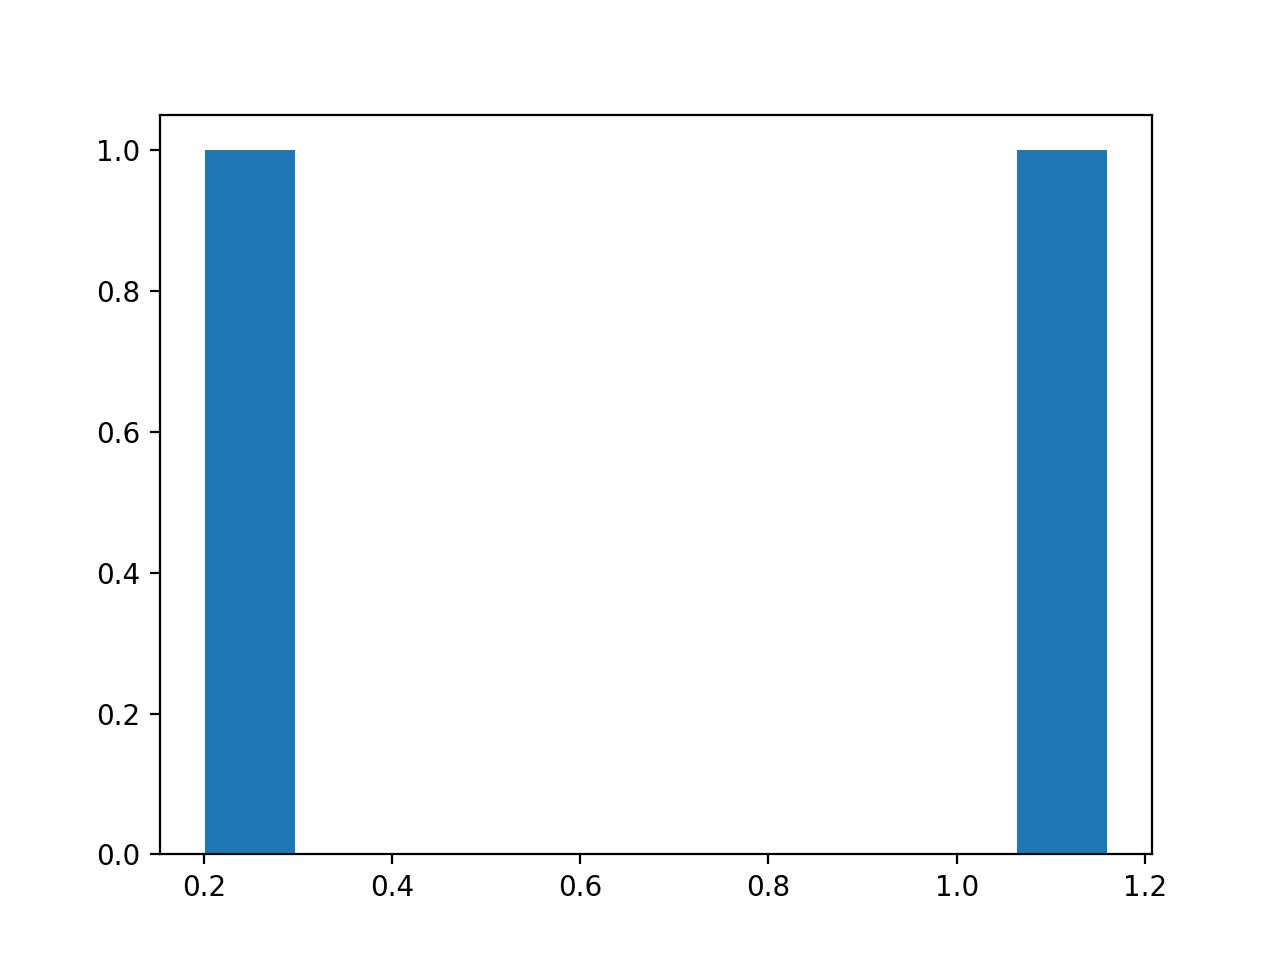

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.20141602, 0.2972412 , 0.3930664 , 0.4888916 , 0.5847168 ,
        0.680542  , 0.7763672 , 0.8721924 , 0.9680176 , 1.0638428 ,
        1.159668  ], dtype=float32),
 <a list of 10 Patch objects>)

In [12]:
plt.hist(ak_arrays["RecHcalBarrelHits.energy"][0].to_numpy())

<IPython.core.display.Javascript object>


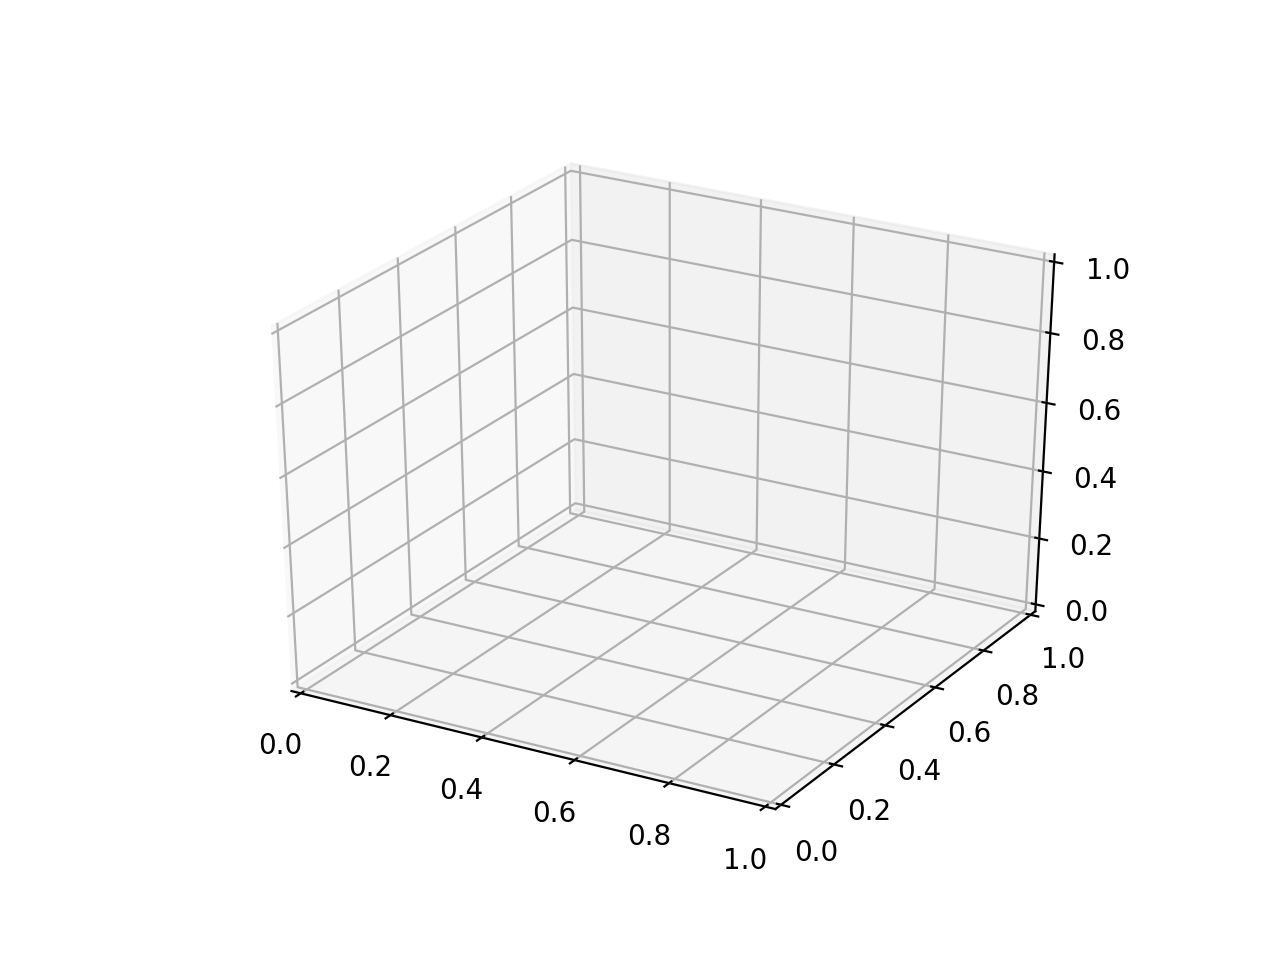

In [13]:
from mpl_toolkits import mplot3d
import matplotlib.colors as colors
import matplotlib.cbook as cbook
fig = plt.figure()


In [14]:
energy = ak_arrays["RecHcalBarrelHits.energy"][1].to_numpy()
x = ak_arrays["RecHcalBarrelHits.position.x"][1].to_numpy()
y = ak_arrays["RecHcalBarrelHits.position.y"][1].to_numpy()
z = ak_arrays["RecHcalBarrelHits.position.z"][1].to_numpy()

ValueError: in ListOffsetArray64 attempting to get 1, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.2.3/src/libawkward/array/ListOffsetArray.cpp#L666)

In [15]:
ax = plt.axes(projection='3d')

#ax.scatter3D(x,y,z,c=energy,   norm=colors.LogNorm(vmin=0.1, vmax=10), cmap='viridis')
ax.scatter3D(x,y,z,c=energy,   norm=colors.LogNorm(vmin=0.01, vmax=100), cmap='viridis')


NameError: name 'x' is not defined